# Creating surfaces
In this notebook we create a surface (mesh) from a 3D dataset of a simulated 3D binary image dataset.

In [1]:
import napari_process_points_and_surfaces as nppas
import pyclesperanto_prototype as cle
import vedo

from branchoid import branchoid

StackViewNDArray([[[0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   ...,
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0]],

                  [[0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   ...,
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0]],

                  [[0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   ...,
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0]],

                  ...,

                  [[0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   ...,
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0]],

                  [[0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   ...,
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0]],

                  [[0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   ...,
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)
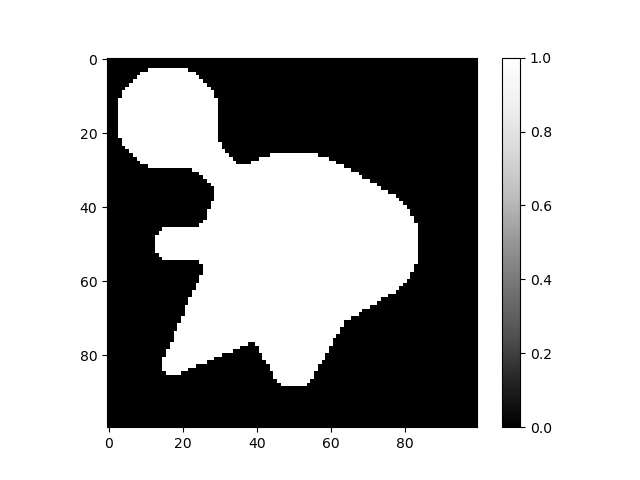
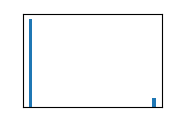

In [2]:
binary_image = branchoid()
binary_image

## Generating surfaces
We first generate a surface from the binary image. In this case, we take _all_ non-zero labeled pixels and turn them into a surface.

In [3]:
surface = nppas.all_labels_to_surface(binary_image)

The resulting object is visualized in Jupyter notebooks like this:

(array([[25.5, 44. , 47. ],
        [26. , 43.5, 47. ],
        [26. , 44. , 46.5],
        ...,
        [74.5, 56. , 51. ],
        [74.5, 56. , 52. ],
        [74.5, 56. , 53. ]]),
 array([[    2,     1,     0],
        [    4,     3,     0],
        [    4,     0,     1],
        ...,
        [19038, 18870, 18872],
        [19038, 18872, 19039],
        [19039, 18872, 18852]], dtype=int64))
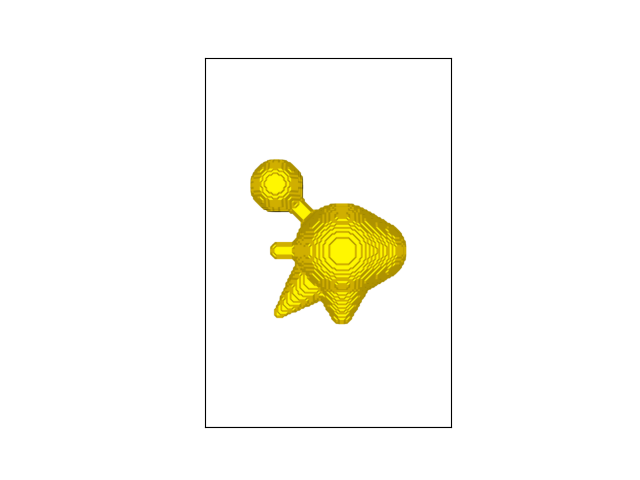

In [4]:
surface

Technically, it is a tuple.

In [5]:
isinstance(surface, tuple)

True

The tuple contains vertices and faces.

In [6]:
vertices, faces = surface

Vertices are lists of lists of Z/Y/X coordinates in 3D space.

In [7]:
vertices

array([[25.5, 44. , 47. ],
       [26. , 43.5, 47. ],
       [26. , 44. , 46.5],
       ...,
       [74.5, 56. , 51. ],
       [74.5, 56. , 52. ],
       [74.5, 56. , 53. ]])

Faces are lists of lists of indices. Every triangle has three point coordinates indexed like this:

In [8]:
faces

array([[    2,     1,     0],
       [    4,     3,     0],
       [    4,     0,     1],
       ...,
       [19038, 18870, 18872],
       [19038, 18872, 19039],
       [19039, 18872, 18852]], dtype=int64)

## Surfaces from individual labels
If we have a label image as starting point, we can also turn individual objects into surfaces.

cl.OCLArray([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint32)
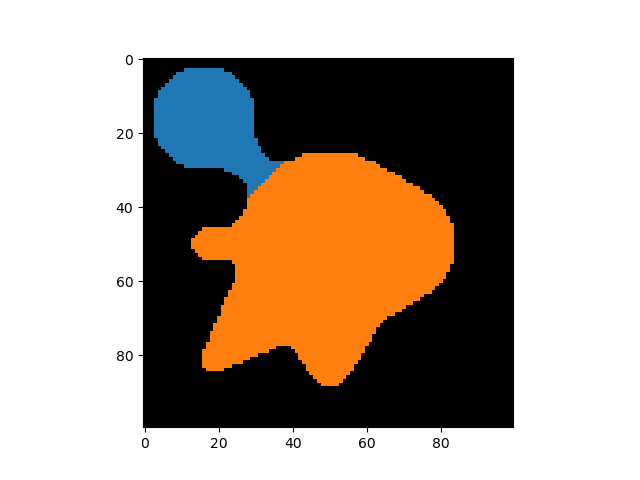

In [9]:
labels = cle.voronoi_otsu_labeling(binary_image, spot_sigma=6)
labels

(array([[26., 42., 49.],
        [26., 43., 48.],
        [25., 43., 49.],
        ...,
        [75., 57., 49.],
        [75., 57., 50.],
        [75., 57., 51.]]),
 array([[   2,    1,    0],
        [   2,    4,    3],
        [   0,    4,    2],
        ...,
        [8095, 8276, 8094],
        [8277, 8276, 8095],
        [8083, 8277, 8095]], dtype=int64))
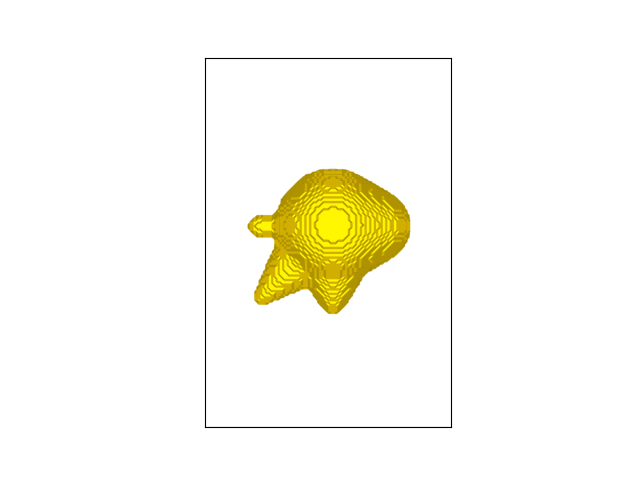

In [10]:
nppas.largest_label_to_surface(labels)

(array([[37., 10., 15.],
        [37., 11., 14.],
        [36., 11., 15.],
        ...,
        [64., 21., 15.],
        [64., 21., 16.],
        [64., 21., 17.]]),
 array([[   2,    1,    0],
        [   2,    4,    3],
        [   0,    4,    2],
        ...,
        [2376, 2470, 2375],
        [2471, 2470, 2376],
        [2367, 2471, 2376]], dtype=int64))
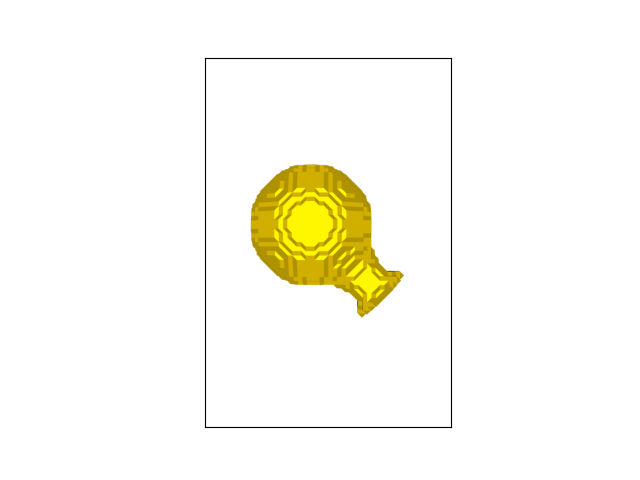

In [11]:
nppas.label_to_surface(labels, label_id=1)

(array([[26., 42., 49.],
        [26., 43., 48.],
        [25., 43., 49.],
        ...,
        [75., 57., 49.],
        [75., 57., 50.],
        [75., 57., 51.]]),
 array([[   2,    1,    0],
        [   2,    4,    3],
        [   0,    4,    2],
        ...,
        [8095, 8276, 8094],
        [8277, 8276, 8095],
        [8083, 8277, 8095]], dtype=int64))
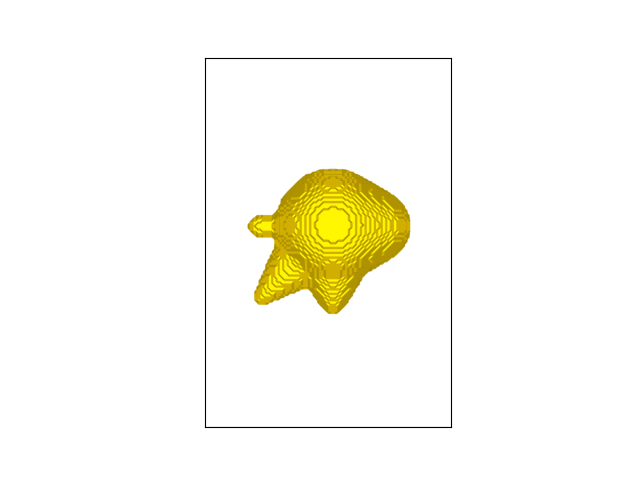

In [12]:
nppas.label_to_surface(labels, label_id=2)

## Creating surfaces using vedo

Vedo also offers functions for creating surfaces such as `iso_surface()`.

In [13]:
volume = vedo.Volume(binary_image)

iso_surface = volume.isosurface()
iso_surface

<Mesh(0x000001FA8D537C50) at 0x000001FA9EC62760>

The resulting data structure is a vedo Mesh. You can access its points and faces as well.

In [14]:
iso_surface.points()

array([[49.       , 11.       ,  2.3333333],
       [50.       , 11.       ,  2.3333333],
       [51.       , 11.       ,  2.3333333],
       ...,
       [52.666668 , 55.       , 83.       ],
       [52.       , 55.666668 , 83.       ],
       [52.       , 55.       , 83.666664 ]], dtype=float32)

In [15]:
iso_surface.faces()[:10]

[[0, 95, 108],
 [0, 1, 97],
 [95, 0, 97],
 [1, 2, 99],
 [97, 1, 99],
 [99, 2, 111],
 [3, 106, 120],
 [3, 4, 109],
 [106, 3, 109],
 [108, 109, 4]]